<a href="https://colab.research.google.com/github/RohanRaghav/Student_performance/blob/main/Randomforest_regression_student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import joblib

# Load datasets
train_df = pd.read_csv('/content/Project_dataset.csv')
test_df = pd.read_csv('/content/Project_dataset_training.csv')

# Mapping for categorical values
club_map = {'None': 0, 'Club': 1, 'Society': 2, 'Both': 3, '*': np.nan}
position_map = {
    'Not a part': 0, 'Intern': 1, 'Co-executive': 2, 'Executive': 3, 'Director': 4,
    'Treasurer': 5, 'Joint-secretary': 6, 'Secretary': 7, 'Student advisor': 8
}
sports_map = {'True': 1, 'False': 0}
hackathon_map = {'Yes': 1, 'No': 0}

# Apply mappings and handle missing values
for df in [train_df, test_df]:
    df['Part of any club or society'] = df['Part of any club or society'].map(club_map).fillna(0)
    df['Position in club or society'] = df['Position in club or society'].map(position_map).fillna(0)
    df['Sports'] = df['Sports'].map(sports_map)
    df['Participated in hackathon?'] = df['Participated in hackathon?'].map(hackathon_map)

# Encode Performance column in training data
label_encoder = LabelEncoder()
train_df['Performance'] = label_encoder.fit_transform(train_df['Performance'])

# Drop non-numeric or unnecessary columns
train_df = train_df.select_dtypes(include=[np.number])
test_df = test_df.select_dtypes(include=[np.number])

# Separate features and target variable
X = train_df.drop(['Performance'], axis=1)
y = train_df['Performance']

# Split the training data for evaluation (e.g., 80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle any remaining missing values
X_train.fillna(0, inplace=True)
X_val.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)

# Ensure the same columns in test and validation sets
X_val = X_val[X_train.columns]
X_test = test_df[X_train.columns]

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model on validation data
y_val_pred = rf_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Model Accuracy on Validation Data: {accuracy:.2f}')

# Save the trained model
joblib.dump(rf_model, 'student_performance_model.pkl')
print("Model saved as 'student_performance_model.pkl'")

# Predict on test data
test_df['Predicted_Performance_Class'] = rf_model.predict(X_test)
test_df['Predicted_Performance_Label'] = label_encoder.inverse_transform(test_df['Predicted_Performance_Class'])

# Save predictions to CSV
test_df[['Predicted_Performance_Label']].to_csv('predicted_student_performance.csv', index=False)

print("Predictions saved to 'predicted_student_performance.csv'")
print(test_df[['Predicted_Performance_Label']].head())


Model Accuracy on Validation Data: 0.99
Model saved as 'student_performance_model.pkl'
Predictions saved to 'predicted_student_performance.csv'
  Predicted_Performance_Label
0                     Average
1                     Average
2                        High
3                        High
4                         Low


In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load datasets
train_df = pd.read_csv('/content/Project_dataset.csv')
test_df = pd.read_csv('/content/Project_dataset_training.csv')

# Mapping for categorical values
club_map = {'None': 0, 'Club': 1, 'Society': 2, 'Both': 3, '*': np.nan}
position_map = {
    'Not a part': 0, 'Intern': 1, 'Co-executive': 2, 'Executive': 3, 'Director': 4,
    'Treasurer': 5, 'Joint-secretary': 6, 'Secretary': 7, 'Student advisor': 8
}
sports_map = {'True': 1, 'False': 0}
hackathon_map = {'Yes': 1, 'No': 0}

# Apply mappings and handle missing values
for df in [train_df, test_df]:
    df['Part of any club or society'] = df['Part of any club or society'].map(club_map).fillna(0)
    df['Position in club or society'] = df['Position in club or society'].map(position_map).fillna(0)
    df['Sports'] = df['Sports'].map(sports_map)
    df['Participated in hackathon?'] = df['Participated in hackathon?'].map(hackathon_map)

# Encode Performance column in training data
label_encoder = LabelEncoder()
train_df['Performance'] = label_encoder.fit_transform(train_df['Performance'])

# Prepare data for training
train_df = train_df.select_dtypes(include=[np.number])
test_df = test_df.select_dtypes(include=[np.number])

X_train = train_df.drop(['Performance'], axis=1)
y_train = train_df['Performance']

X_test = test_df.copy()

# Handle missing values
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

X_test = X_test[X_train.columns]

# Train RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict Performance Class
test_df['Predicted_Performance_Class'] = rf_model.predict(X_test)
test_df['Predicted_Performance_Label'] = label_encoder.inverse_transform(test_df['Predicted_Performance_Class'])

# Assign marks based on performance level
performance_to_marks = {
    'Low': (0, 40),
    'Average': (41, 70),
    'High': (71, 100),
}

def assign_marks(label):
    if label in performance_to_marks:
        low, high = performance_to_marks[label]
        return np.random.randint(low, high + 1)
    else:
        return 0

test_df['Predicted_Performance_Marks'] = test_df['Predicted_Performance_Label'].apply(assign_marks)

# Save predictions with marks
test_df[['Predicted_Performance_Label', 'Predicted_Performance_Marks']].to_csv('predicted_student_performance_with_marks.csv', index=False)

print("Predictions saved to 'predicted_student_performance_with_marks.csv'")
print(test_df[['Predicted_Performance_Label', 'Predicted_Performance_Marks']].head())


Predictions saved to 'predicted_student_performance_with_marks.csv'
  Predicted_Performance_Label  Predicted_Performance_Marks
0                     Average                           68
1                     Average                           56
2                        High                           82
3                        High                           73
4                         Low                            4


Please provide the path to your CSV file (e.g., /content/user_uploaded_data.csv): /content/test.csv
Predictions saved to '/content/predicted_student_performance_with_names.csv'
             Name         Uid Predicted_Performance_Label  \
0       Meenakshy  22BAI71194                         Low   
1  SAMRIDHI SINGH  22BAI70775                      Medium   
2  Aditya Niphade  22BAI70091                        High   
3          Shreya  22BAI70099                         Low   
4      Mohd Rahil  22BAI70212                      Medium   

   Predicted_Performance_Marks  
0                           21  
1                          100  
2                           70  
3                           27  
4                          100  


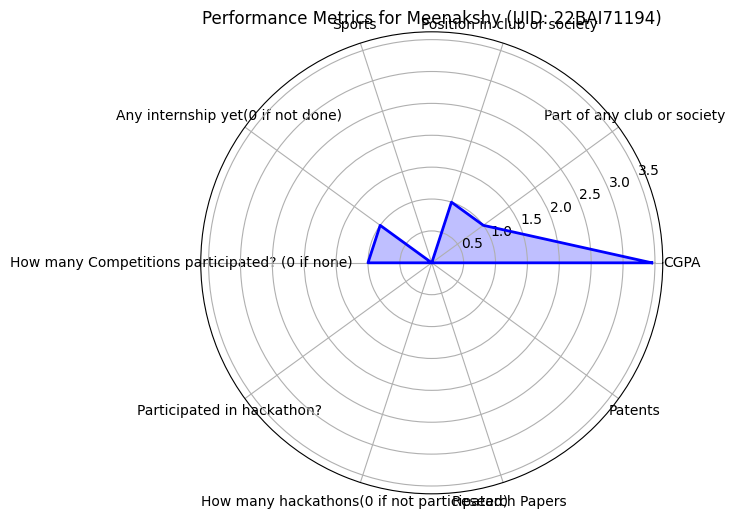

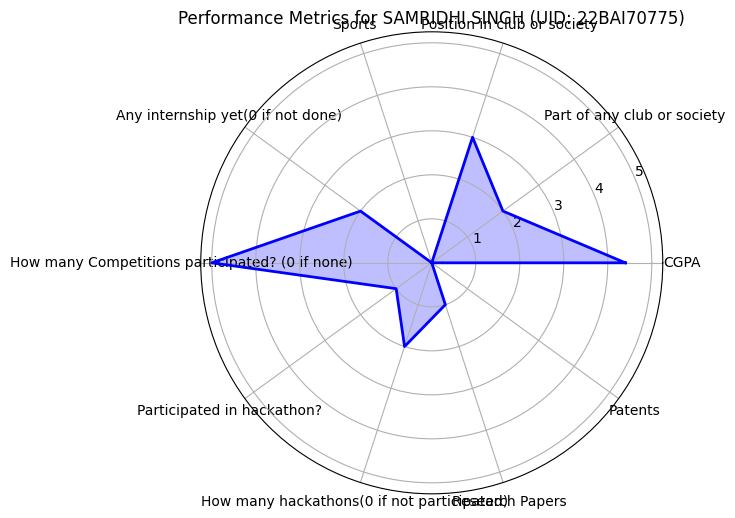

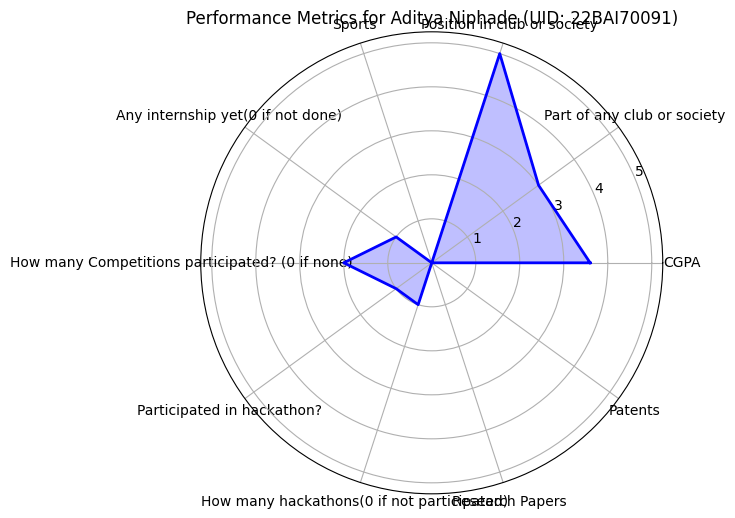

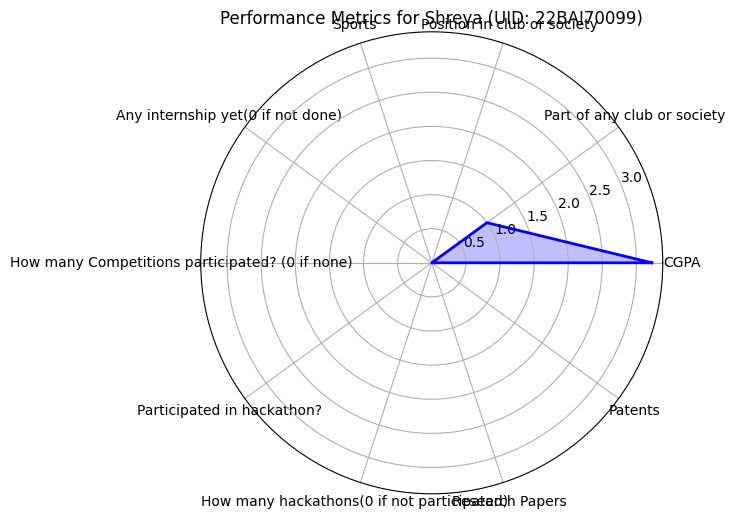

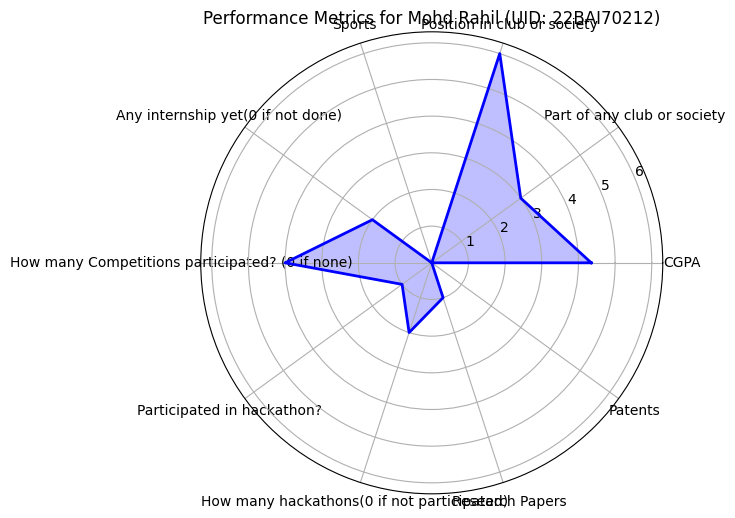

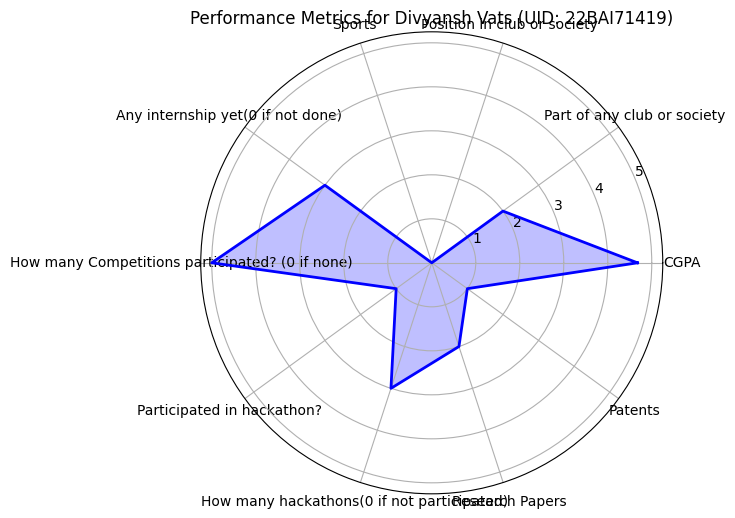

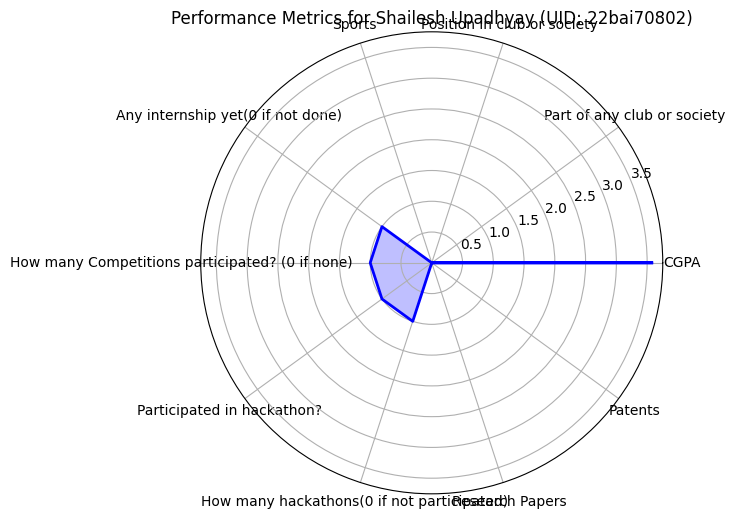

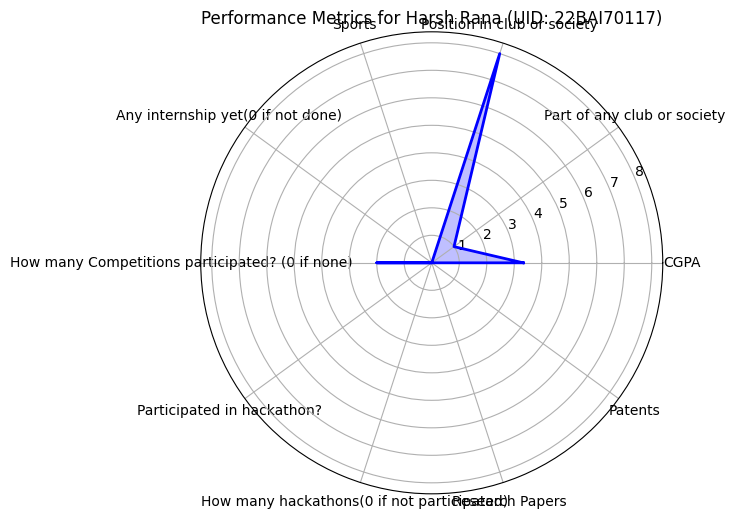

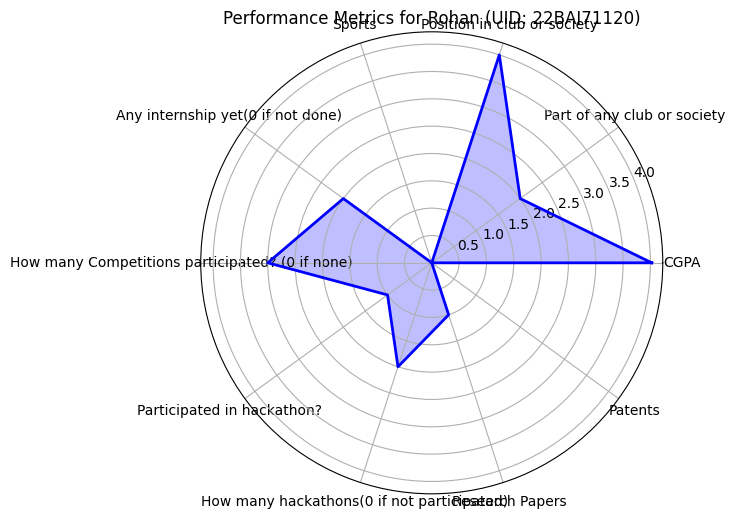

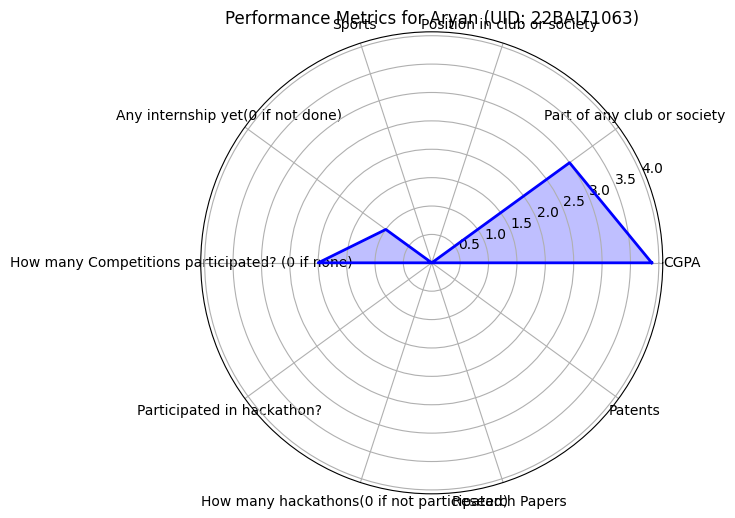

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('/content/student_performance_model.pkl')

# Ask the user for the CSV file path (e.g., user uploads or inputs path)
csv_path = input("Please provide the path to your CSV file (e.g., /content/user_uploaded_data.csv): ")

# Load the CSV file into a DataFrame
input_df = pd.read_csv(csv_path)

# Extract 'Name' and 'UID' columns for later
names_uids = input_df[['Name', 'Uid']]

# Categorical mappings
club_map = {'None': 0, 'Club': 1, 'Society': 2, 'Both': 3, '*': np.nan}
position_map = {'Not a part': 0, 'Intern': 1, 'Co-executive': 2, 'Executive': 3, 'Director': 4,
                'Treasurer': 5, 'Joint-secretary': 6, 'Secretary': 7, 'Student advisor': 8}
sports_map = {'True': 1, 'False': 0}
hackathon_map = {'Yes': 1, 'No': 0}

# Apply mappings
input_df['Part of any club or society'] = input_df['Part of any club or society'].map(club_map).fillna(0)
input_df['Position in club or society'] = input_df['Position in club or society'].map(position_map).fillna(0)
input_df['Sports'] = input_df['Sports'].map(sports_map)
input_df['Participated in hackathon?'] = input_df['Participated in hackathon?'].map(hackathon_map)

# Select only numeric columns for prediction
X_input = input_df.select_dtypes(include=[np.number])

# Handle missing values
X_input.fillna(0, inplace=True)

# Predict performance class
predicted_classes = model.predict(X_input)

# Map predictions
performance_labels = {0: 'Low', 1: 'Medium', 2: 'High'}
predicted_labels = [performance_labels.get(c, 'Unknown') for c in predicted_classes]

# Swap "High" and "Low"
swapped_labels = ['Low' if label == 'High' else 'High' if label == 'Low' else label for label in predicted_labels]

# Assign marks
performance_to_marks = {'High': (0, 40), 'Average': (41, 70), 'Low': (71, 100)}

def assign_marks(label):
    low, high = performance_to_marks.get(label, (0, 0))
    return np.random.randint(low, high + 1)

predicted_marks = [assign_marks(label) for label in swapped_labels]

# Subtract marks from 100
adjusted_marks = [100 - mark for mark in predicted_marks]

# Save results
output_df = names_uids.copy()
output_df['Predicted_Performance_Label'] = swapped_labels
output_df['Predicted_Performance_Marks'] = adjusted_marks

output_path = '/content/predicted_student_performance_with_names.csv'
output_df.to_csv(output_path, index=False)

print(f"Predictions saved to '{output_path}'")
print(output_df.head())

# Spider Chart Function
def plot_radar_chart(student_data, student_name, student_uid):
    labels = list(student_data.index)
    values = student_data.values

    # Apply special conditions
    if 'Sports' in student_data and student_data['Sports'] == 1:
        student_data['Sports'] = max(values)  # Set to max value

    if 'Participated in hackathon?' in student_data and student_data['Participated in hackathon?'] == 1:
        if 'Number of Hackathons' in student_data and student_data['Number of Hackathons'] > 3:
            student_data['Number of Hackathons'] = max(values)  # Plot as max

    if 'CGPA' in student_data:
        student_data['CGPA'] /= 2  # Scale down CGPA

    values = student_data.values
    num_vars = len(labels)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    values = np.concatenate((values, [values[0]]))  # Close the loop
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='b', alpha=0.25)
    ax.plot(angles, values, color='b', linewidth=2)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=10)

    plt.title(f"Performance Metrics for {student_name} (UID: {student_uid})", fontsize=12)
    plt.show()

# Generate spider chart for each student
for index, row in X_input.iterrows():
    plot_radar_chart(row, names_uids.iloc[index]['Name'], names_uids.iloc[index]['Uid'])
